# LSTM-Based Stock Price Prediction – Tata Motors (NSE)

This notebook demonstrates a simple LSTM-based stock price prediction model for Tata Motors using historical NSE data.

## Objective
Build an LSTM model to predict the closing stock price of Tata Motors using past price data.

## Import Required Libraries

In [13]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


## Load Stock Data

In [14]:

data = yf.download("TATAMOTORS.NS", start="2015-01-01")
data = data[['Close']]
data.tail()


/tmp/ipython-input-493960045.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TATAMOTORS.NS", start="2015-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TATAMOTORS.NS
Date,
2025-12-18,345.799988
2025-12-19,352.649994
2025-12-22,359.149994
2025-12-23,363.250000
2025-12-24,359.200012


## Data Scaling

In [15]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


## Create Time Series Sequences

In [16]:

X, y = [], []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))


## Train-Test Split

In [17]:

split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## Build LSTM Model

In [18]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [19]:

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0162
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 3.7025e-04
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.6648e-04
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.8658e-04
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 3.0233e-04
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 2.6308e-04
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.4716e-04
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 2.2449e-04
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.1884e-04
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.1724e-04


## Make Predictions

In [20]:

predicted = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


## Visualization

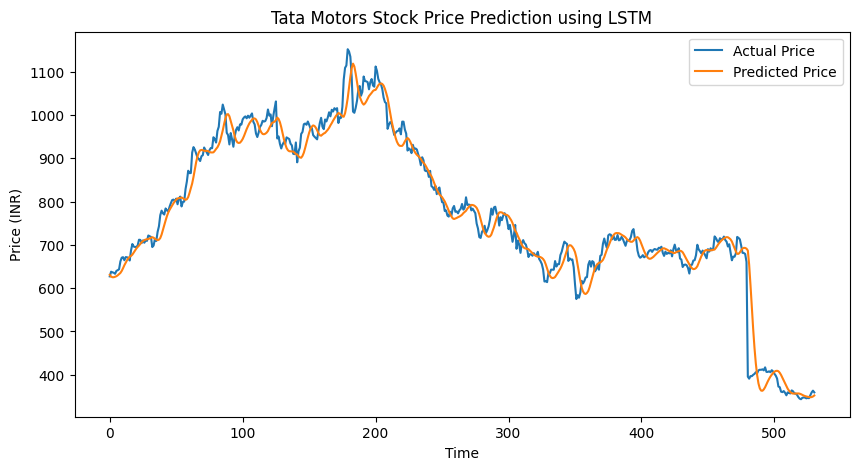

In [21]:

plt.figure(figsize=(10, 5))
plt.plot(real_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("Tata Motors Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


## Conclusion
This notebook demonstrates a basic LSTM-based approach for stock price prediction using historical Tata Motors data. The model captures general trends but is intended for educational purposes only.